<a href="https://colab.research.google.com/github/aayushabhatia/Data-Science-and-Business-Intelligence/blob/main/EDA_StoryTelling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AAYUSHA BHATIA    22070122004   CSE-A**

**EDA and Story Telling Assignment**

Objective:
To apply data science techniques (exploratory data analysis, feature engineering, machine learning, and storytelling) to predict customer churn for a business using historical data.

Assignment Tasks:
Data Collection and Cleaning:

Choose a publicly available customer data dataset (e.g., Telco customer churn dataset from Kaggle, or a similar dataset).

Preprocess the dataset by cleaning missing values, handling outliers, encoding categorical variables, and scaling/normalizing numerical variables as needed.

Exploratory Data Analysis (EDA):

Perform EDA on the dataset to identify patterns, trends, and insights related to customer behavior.

Visualize key metrics such as customer demographics, service usage patterns, and churn rates.

Identify potential correlations or significant features that could predict customer churn (e.g., tenure, usage frequency, payment method).

Feature Engineering:

Create new features from existing ones that might improve the predictive power of your model.

Example: Derive a "churn risk" feature based on customer usage frequency or a "customer satisfaction score" from survey responses.

Model Building:

Build a machine learning model to predict customer churn (e.g., Logistic Regression, Decision Trees, Random Forest, or Gradient Boosting).

Split the dataset into training and test sets.

Train the model and evaluate it using appropriate metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

Model Evaluation and Tuning:

Evaluate the model’s performance using confusion matrix, classification report, and ROC curve.

If necessary, fine-tune the model using techniques like hyperparameter optimization (e.g., GridSearchCV or RandomizedSearchCV) to improve performance.

Storytelling and Communication of Results:

Interpret the results and present the findings clearly.

Explain the most important features driving customer churn and their implications for the business (e.g., high churn rate among customers with low engagement or a specific payment method).

Use visualizations (like feature importance plots, confusion matrices, and ROC curves) to effectively communicate the model's performance and key insights.

Business Recommendations:

Based on the model and insights, provide actionable recommendations to the business to reduce churn.

Example: If the model suggests that customers with a low tenure are more likely to churn, recommend targeted retention strategies like special offers for new customers.



Saving customer_churn_dataset-testing-master.csv to customer_churn_dataset-testing-master.csv


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


Initial DataFrame:
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4           

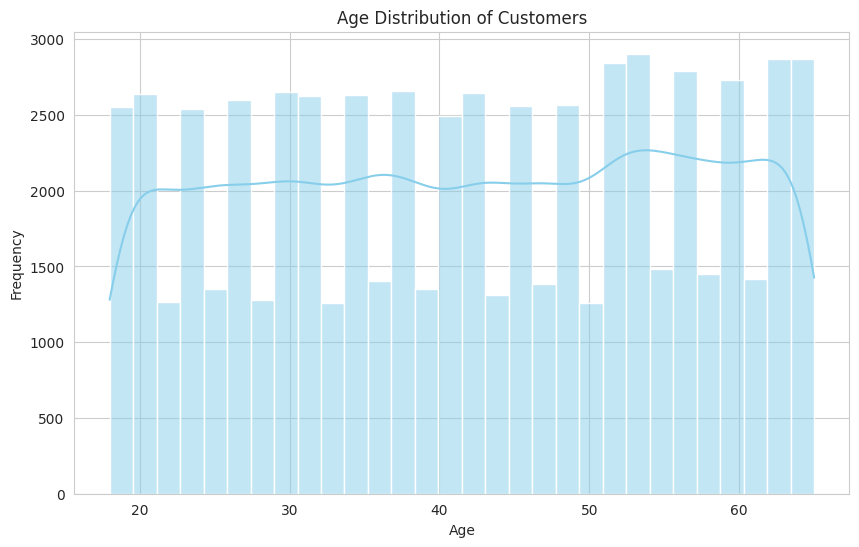

<ipython-input-2-8d75e500798b>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


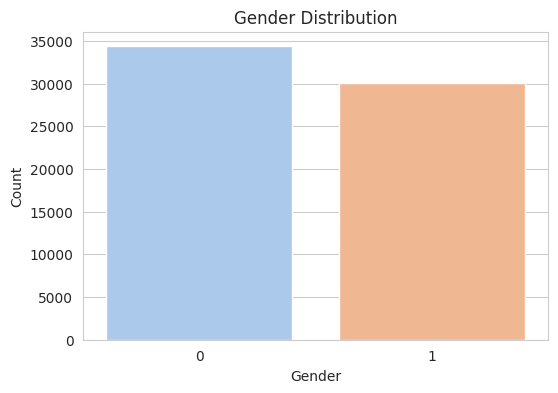

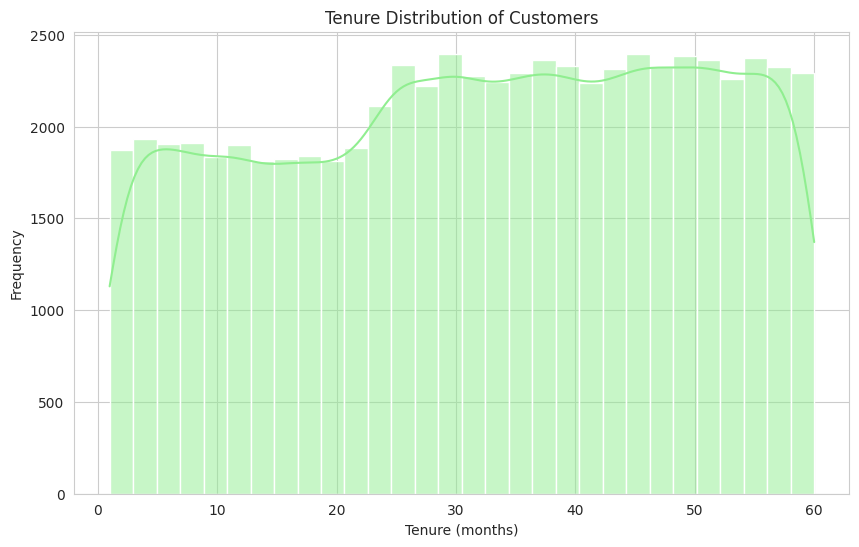

<ipython-input-2-8d75e500798b>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription Type', data=df, palette='muted')


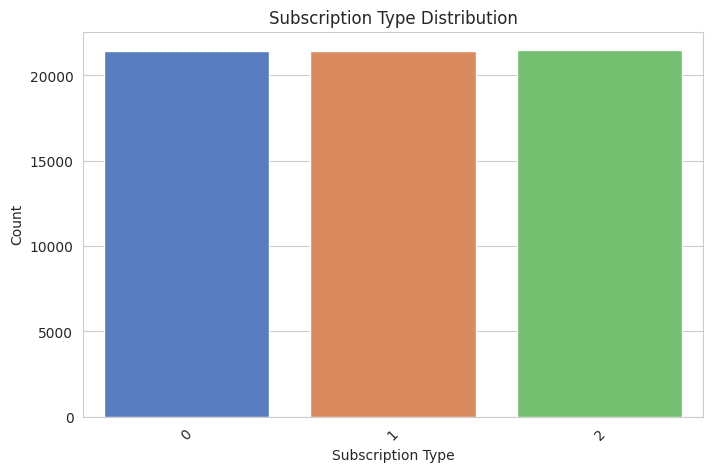

<ipython-input-2-8d75e500798b>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


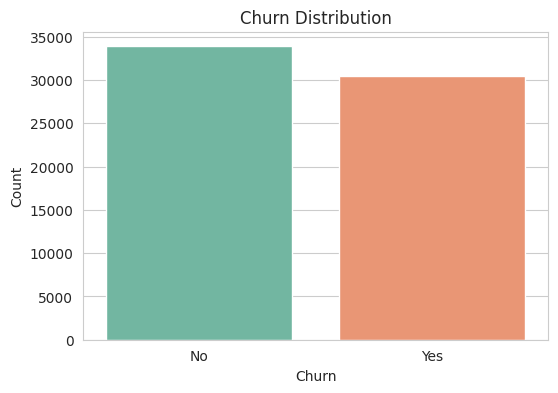

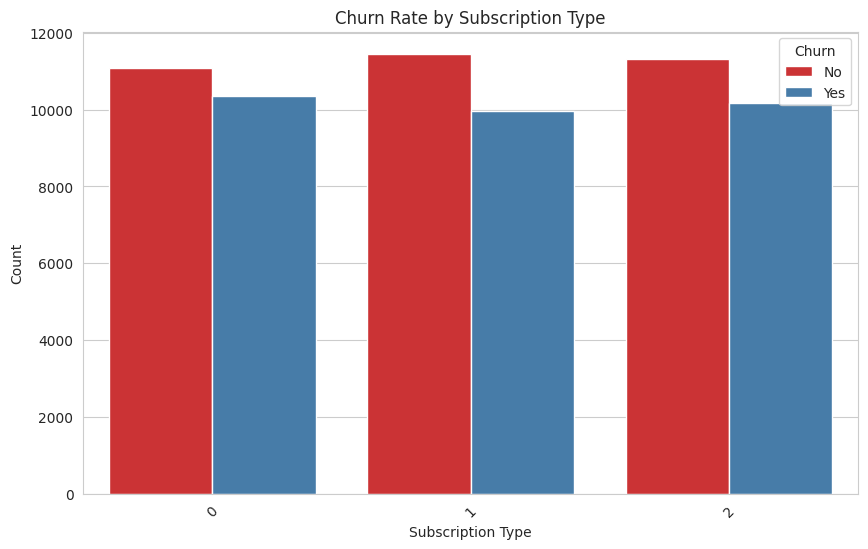

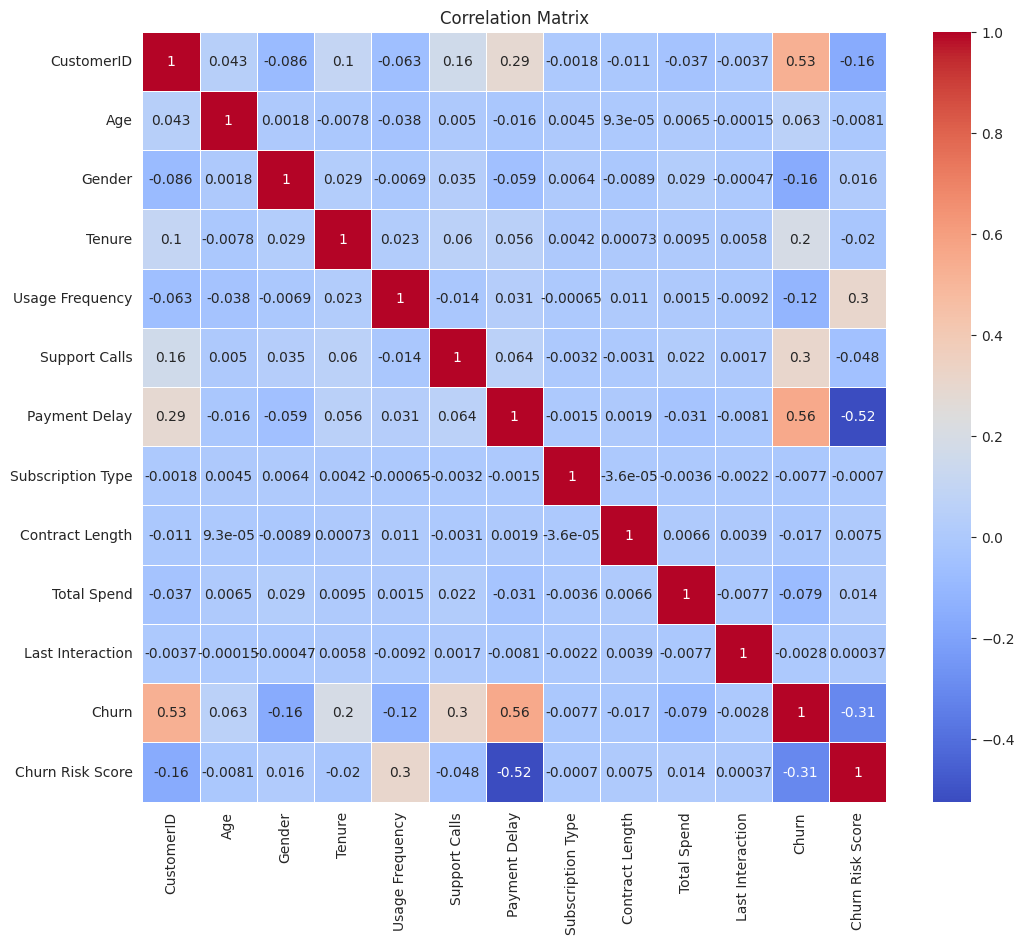

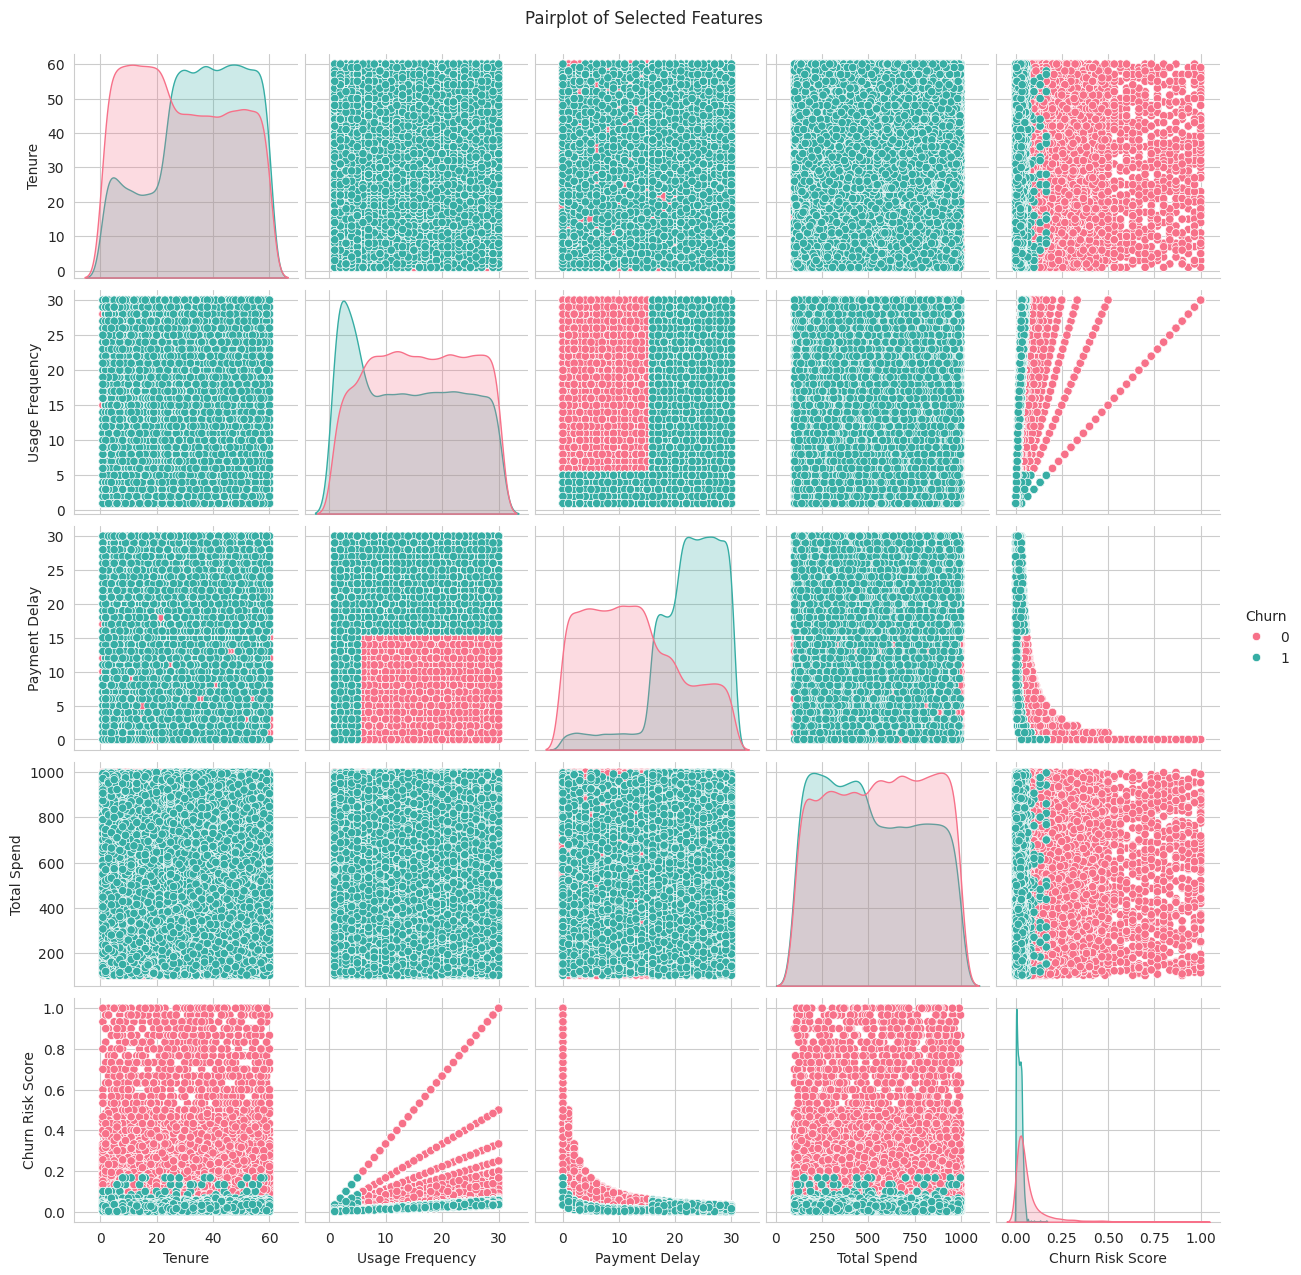

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from google.colab import files
uploaded= files.upload()

# Load the dataset
df = pd.read_csv('customer_churn_dataset-testing-master.csv')
display(df)

# Display initial dataset information
print("Initial DataFrame:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())

# Step 1: Handle missing values
# Fill missing numerical values with the median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Fill missing categorical values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Step 2: Encode categorical variables
# Initialize LabelEncoder
le = LabelEncoder()
# Encode each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 3: Feature Engineering
# Create a 'Churn Risk Score' based on Usage Frequency and Payment Delay
df['Churn Risk Score'] = df['Usage Frequency'] / (df['Payment Delay'] + 1)

# Normalize 'Churn Risk Score'
scaler = MinMaxScaler()
df[['Churn Risk Score']] = scaler.fit_transform(df[['Churn Risk Score']])

# Display cleaned dataset information
print("\nCleaned DataFrame:")
print(df.head())

# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_customer_churn_data.csv', index=False)

print("\nData preprocessing completed successfully!")

#EDA
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Step 1: Visualize Customer Demographics

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Step 2: Analyze Service Usage Patterns

# Tenure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], bins=30, kde=True, color='lightgreen')
plt.title('Tenure Distribution of Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

# Subscription Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Subscription Type', data=df, palette='muted')
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 3: Examine Churn Rates

# Overall Churn Rate
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Churn Rate by Subscription Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Subscription Type', hue='Churn', data=df, palette='Set1')
plt.title('Churn Rate by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Step 4: Identify Potential Predictors of Churn

# Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot of Selected Features
selected_features = ['Tenure', 'Usage Frequency', 'Payment Delay', 'Total Spend', 'Churn', 'Churn Risk Score']
sns.pairplot(df[selected_features], hue='Churn', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()